In [156]:
# Sources: http://sdwebx.worldbank.org/climateportal/index.cfm?page=downscaled_data_download&menu=historical

# Temperature in African countries from 1901 to 2005 by month

In [157]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 8)

In [158]:
df = pd.read_csv('data/ts_africa.csv')

In [159]:
df.head()

,tas,year,month,country,ISO3,ISO2
0,22.2717,1901,1,SDN,NaN,NaN
1,25.1677,1901,2,SDN,NaN,NaN
2,27.1083,1901,3,SDN,NaN,NaN
3,28.9440,1901,4,SDN,NaN,NaN
4,30.4281,1901,5,SDN,NaN,NaN


In [160]:
#df.loc[:, 'Year':'Month'] = df.loc[:, 'Temperature':'RainHs'].apply(pd.to_numeric)

df['date'] = df.apply(lambda row: datetime(row['year'], row['month'], 1), axis=1)

#df[[]'Year'] = pd.to_datetime(df['Year'])

In [161]:
df.drop(['year', 'month', 'ISO3', 'ISO2'], axis=1, inplace=True)

In [162]:
df.head()

,tas,country,date
0,22.2717,SDN,1901-01-01
1,25.1677,SDN,1901-02-01
2,27.1083,SDN,1901-03-01
3,28.9440,SDN,1901-04-01
4,30.4281,SDN,1901-05-01


In [163]:
df = df.rename(columns = {'country':'alpha-3'})

In [164]:
df.head()

,tas,alpha-3,date
0,22.2717,SDN,1901-01-01
1,25.1677,SDN,1901-02-01
2,27.1083,SDN,1901-03-01
3,28.9440,SDN,1901-04-01
4,30.4281,SDN,1901-05-01


In [165]:
iso = pd.read_csv('data/country_code.csv')
iso.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,region-code,sub-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [166]:
df_merged = pd.merge(df, iso, on='alpha-3')

In [167]:
df_merged = df_merged[['tas', 'date', 'name', 'alpha-3']]

In [168]:
df_merged.head()

,tas,date,name,alpha-3
0,22.2717,1901-01-01,Sudan,SDN
1,25.1677,1901-02-01,Sudan,SDN
2,27.1083,1901-03-01,Sudan,SDN
3,28.9440,1901-04-01,Sudan,SDN
4,30.4281,1901-05-01,Sudan,SDN


In [169]:
df_merged.groupby('name').count().index

Index(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo', 'Côte d'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Gabon', 'Sudan'],
      dtype='object', name='name')

In [170]:
df_merged[['tas', 'date', 'name']].to_csv('data/ts_africa_clean.csv', index=False)

## Now analysing

In [171]:
df = pd.read_csv('data/ts_africa_clean.csv')

In [172]:
df.head()

,tas,date,name
0,22.2717,1901-01-01,Sudan
1,25.1677,1901-02-01,Sudan
2,27.1083,1901-03-01,Sudan
3,28.9440,1901-04-01,Sudan
4,30.4281,1901-05-01,Sudan


In [173]:
df.set_index(pd.DatetimeIndex(df['date']), inplace=True)

In [174]:
df.drop('date', axis=1, inplace=True)

In [175]:
df.head()

,tas,name
date,,
1901-01-01,22.2717,Sudan
1901-02-01,25.1677,Sudan
1901-03-01,27.1083,Sudan
1901-04-01,28.9440,Sudan
1901-05-01,30.4281,Sudan


In [176]:
df_rot = df.pivot(columns='name', values='tas')

In [177]:
df_rot.head()

name,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cabo Verde,Cameroon,Central African Republic,Chad,Comoros,Congo,Côte d'Ivoire,Djibouti,Egypt,Equatorial Guinea,Eritrea,Ethiopia,Gabon,Sudan
date,,,,,,,,,,,,,,,,,,,,
1901-01-01,12.0806,22.6912,24.8714,26.7184,22.9305,20.1005,21.3606,23.7460,24.1947,20.6576,25.0430,24.6351,24.8861,23.6027,12.7916,24.8265,22.7404,21.4340,25.4648,22.2717
1901-02-01,14.2311,22.7454,28.3487,25.9084,27.5229,20.2301,21.5441,25.3324,26.0657,23.1814,25.0968,25.2827,27.8502,24.9196,16.5179,25.3365,24.6940,23.0475,25.7578,25.1677
1901-03-01,17.8110,22.5434,28.9665,24.6126,29.2438,20.2801,21.6221,25.9880,26.9181,26.5562,26.0320,25.1860,27.8245,26.2823,19.0889,24.7173,25.5125,23.8133,25.4344,27.1083
1901-04-01,22.6980,21.7076,29.6790,21.9750,31.3461,20.2406,22.6734,26.3637,26.7826,29.5472,26.5716,25.2860,27.7258,27.6365,22.5923,25.0810,27.1085,23.9284,25.7031,28.9440
1901-05-01,25.9776,20.7716,28.4150,17.4224,30.2692,19.9333,21.5232,25.5568,25.9309,30.9551,25.4725,25.2754,26.7334,29.4531,25.6290,25.1117,28.8672,23.8515,25.6669,30.4281


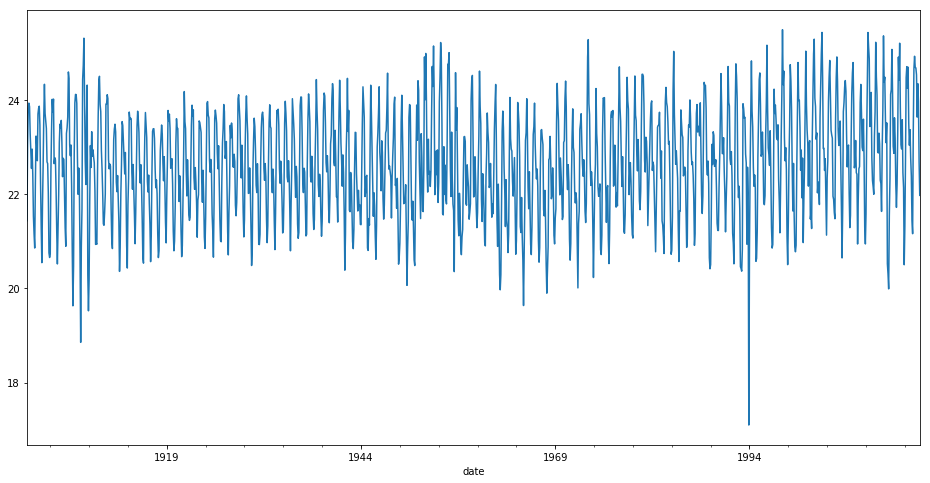

In [189]:
plt.rcParams['figure.figsize'] = (16, 8)

df_rot['Ethiopia'].plot()

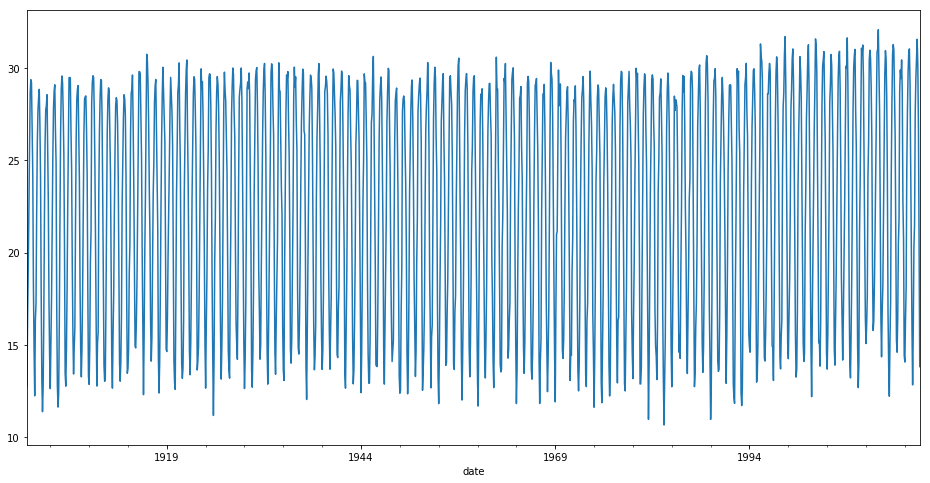

In [179]:
df_rot['Egypt'].plot()

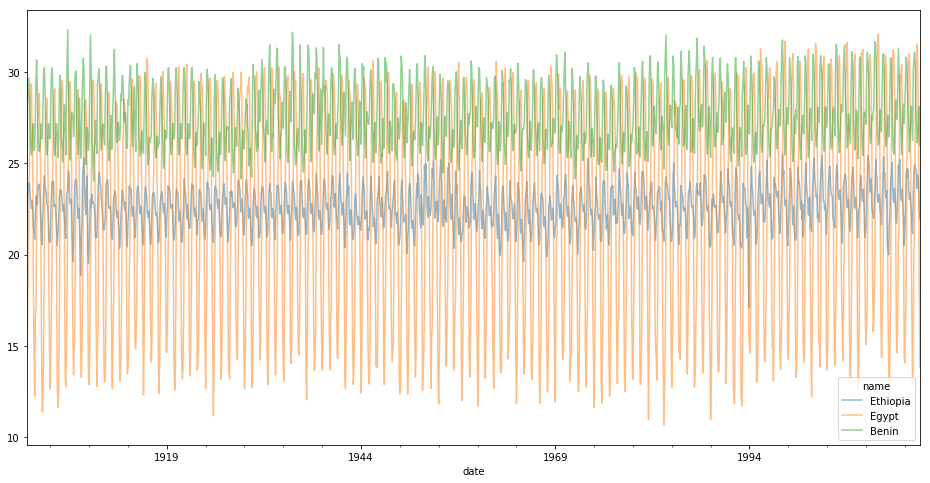

In [180]:
df_rot[['Ethiopia', 'Egypt', 'Benin']].plot(alpha=0.5)

## Introducing Bokeh

In [181]:
from bokeh.charts import TimeSeries, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [182]:
bokeh.__version__

'0.12.4'

In [183]:
test = df_rot.reset_index()

In [184]:
test.head()

name,date,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cabo Verde,Cameroon,Central African Republic,...,Comoros,Congo,Côte d'Ivoire,Djibouti,Egypt,Equatorial Guinea,Eritrea,Ethiopia,Gabon,Sudan
0,1901-01-01,12.0806,22.6912,24.8714,26.7184,22.9305,20.1005,21.3606,23.7460,24.1947,...,25.0430,24.6351,24.8861,23.6027,12.7916,24.8265,22.7404,21.4340,25.4648,22.2717
1,1901-02-01,14.2311,22.7454,28.3487,25.9084,27.5229,20.2301,21.5441,25.3324,26.0657,...,25.0968,25.2827,27.8502,24.9196,16.5179,25.3365,24.6940,23.0475,25.7578,25.1677
2,1901-03-01,17.8110,22.5434,28.9665,24.6126,29.2438,20.2801,21.6221,25.9880,26.9181,...,26.0320,25.1860,27.8245,26.2823,19.0889,24.7173,25.5125,23.8133,25.4344,27.1083
3,1901-04-01,22.6980,21.7076,29.6790,21.9750,31.3461,20.2406,22.6734,26.3637,26.7826,...,26.5716,25.2860,27.7258,27.6365,22.5923,25.0810,27.1085,23.9284,25.7031,28.9440
4,1901-05-01,25.9776,20.7716,28.4150,17.4224,30.2692,19.9333,21.5232,25.5568,25.9309,...,25.4725,25.2754,26.7334,29.4531,25.6290,25.1117,28.8672,23.8515,25.6669,30.4281


In [185]:
data = dict(
    Country = test['Ethiopia'],
    Date = test['date']
)

tsline = TimeSeries(data,
    x='Date', y='Country')

#output_file("timeseries.html")

show(tsline, notebook_handle=True )